### plot behavioural results

In [93]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
df = pd.read_csv('../data/fmri_behavioural_new.csv')

In [46]:
dfna = df.dropna(subset=['obs_p1g2', 'obs_p2g1'], how='all')

In [47]:
dfna.shape

(2104, 17)

In [168]:
dfm1 = dfna[['gen_p1g2', 'obs_p1g2','subject']].dropna()
dfm11 = dfm1.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm11['subject'] = dfm1['subject']
dfm11['Generative p(L|H)'] = dfm11['gen_p1g2']
dfm11['Rated p(L|H)'] = dfm11['obs_p1g2']
stats.pearsonr(dfm11['Generative p(L|H)'], dfm11['Rated p(L|H)'])

(0.13139930964025162, 3.589510548475801e-05)

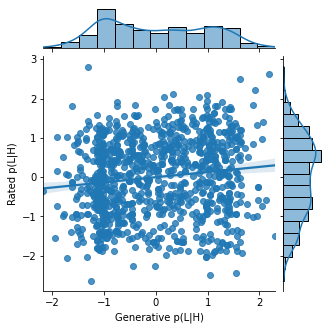

In [174]:
g = sns.jointplot(data=dfm11, x='Generative p(L|H)', y='Rated p(L|H)', kind='reg')#color="#4CB391", 
g.fig.set_figwidth(4.5)
g.fig.set_figheight(4.5)
plt.savefig('./figs/p1g2.png', bbox_inches='tight')

In [175]:
# sns.lmplot(data=dfna, x='gen_p1g2', y='obs_p1g2', hue='subject')

In [176]:
dfm2 = dfna[['gen_p2g1', 'obs_p2g1', 'subject']].dropna()
dfm22 = dfm2.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm22['subject'] = dfm2['subject']
dfm22['Generative p(H|L)'] = dfm22['gen_p2g1']
dfm22['Rated p(H|L)'] = dfm22['obs_p2g1']
stats.pearsonr(dfm22['Generative p(H|L)'], dfm22['Rated p(H|L)'])

(0.1187039171573626, 6.775759665809192e-05)

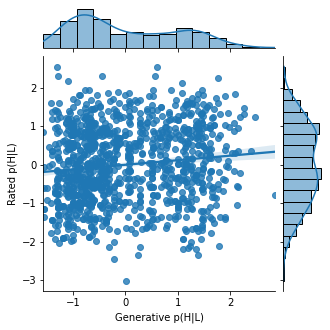

In [177]:
g = sns.jointplot(data=dfm22, x='Generative p(H|L)', y='Rated p(H|L)', kind='reg')#color="#4CB391", 
g.fig.set_figwidth(4.5)
g.fig.set_figheight(4.5)
plt.savefig('./figs/p2g1.png', bbox_inches='tight')